<a href="https://colab.research.google.com/github/7h3s74r5/Customer-Segmentation/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_excel("Customer_Purchase Dataset.xlsx")

In [5]:
df.head()


,Customer ID,Age,Gender,Education,Review,Income,PURCHASES_FREQUENCY
0,1021,30,Female,School,Average,124670,0.166667
1,1022,68,Female,UG,Poor,150773,0.000000
2,1023,70,Female,PG,Good,89210,1.000000
3,1024,72,Female,PG,Good,171565,0.083333
4,1025,16,Female,UG,Average,149031,0.083333


In [6]:
df.describe()

,Customer ID,Age,Income,PURCHASES_FREQUENCY
count,50.00000,50.000000,50.000000,50.000000
mean,1045.50000,54.160000,132206.160000,0.509167
std,14.57738,25.658161,35356.168959,0.411472
min,1021.00000,15.000000,65421.000000,0.000000
25%,1033.25000,30.250000,108523.500000,0.083333
50%,1045.50000,57.000000,132289.500000,0.458334
75%,1057.75000,74.000000,154225.750000,1.000000
max,1070.00000,98.000000,261952.000000,1.000000


In [7]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Education', 'Review', 'Income',
       'PURCHASES_FREQUENCY'],
      dtype='object')

sns.distplot(df['Income'])

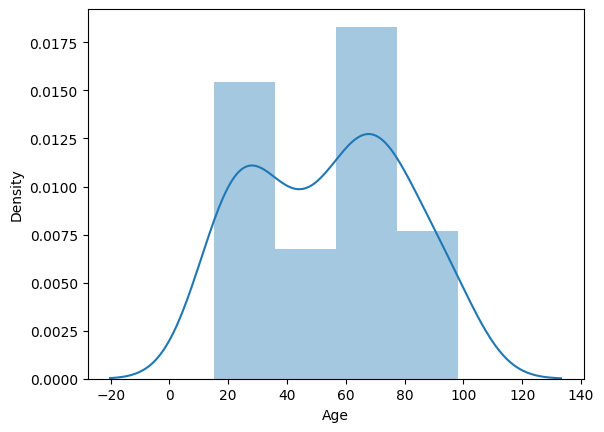

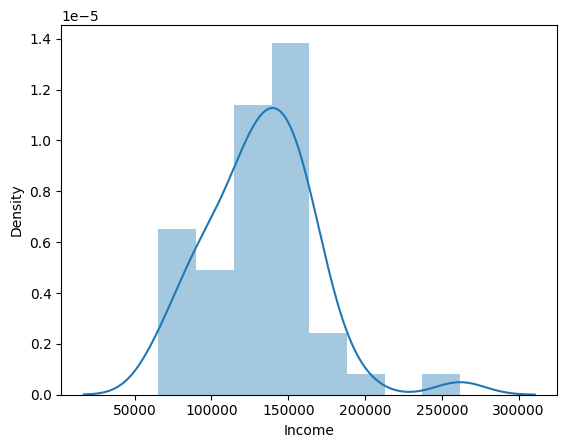

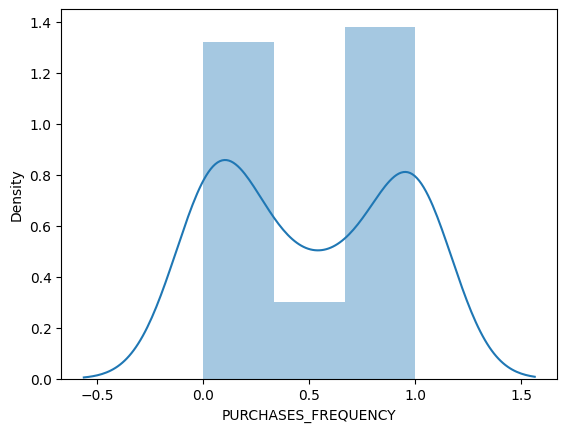

In [8]:
columns= ['Age', 'Income','PURCHASES_FREQUENCY']
for i in columns:
  plt.figure()
  sns.distplot(df[i])


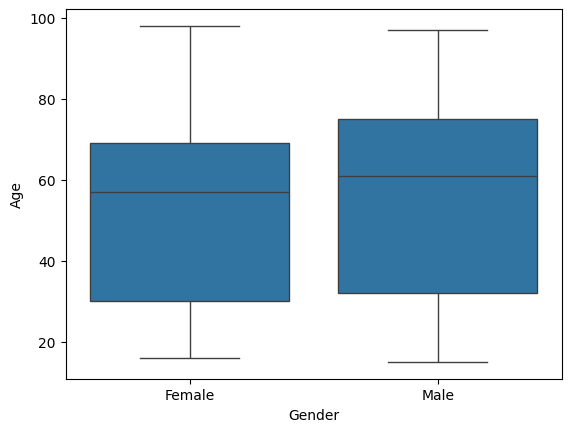

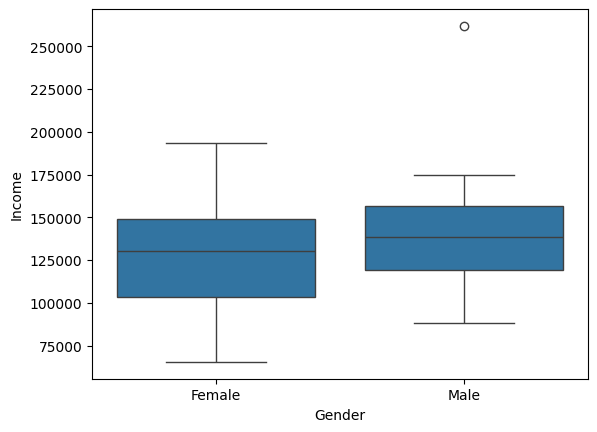

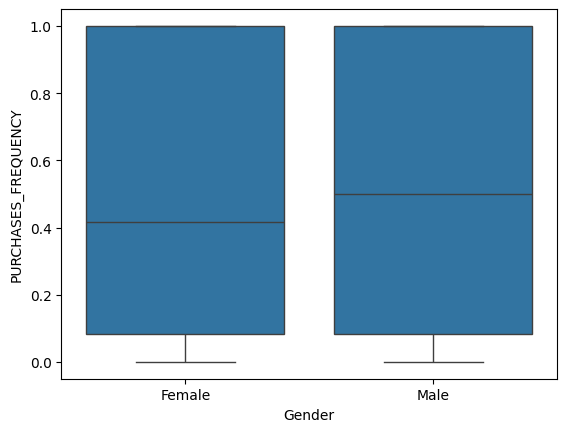

In [9]:
for i in columns:
  plt.figure()
  sns.boxplot(data= df, x= 'Gender', y= df[i])

In [10]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Female,0.58
Male,0.42


BIVARIATE ANALYSIS

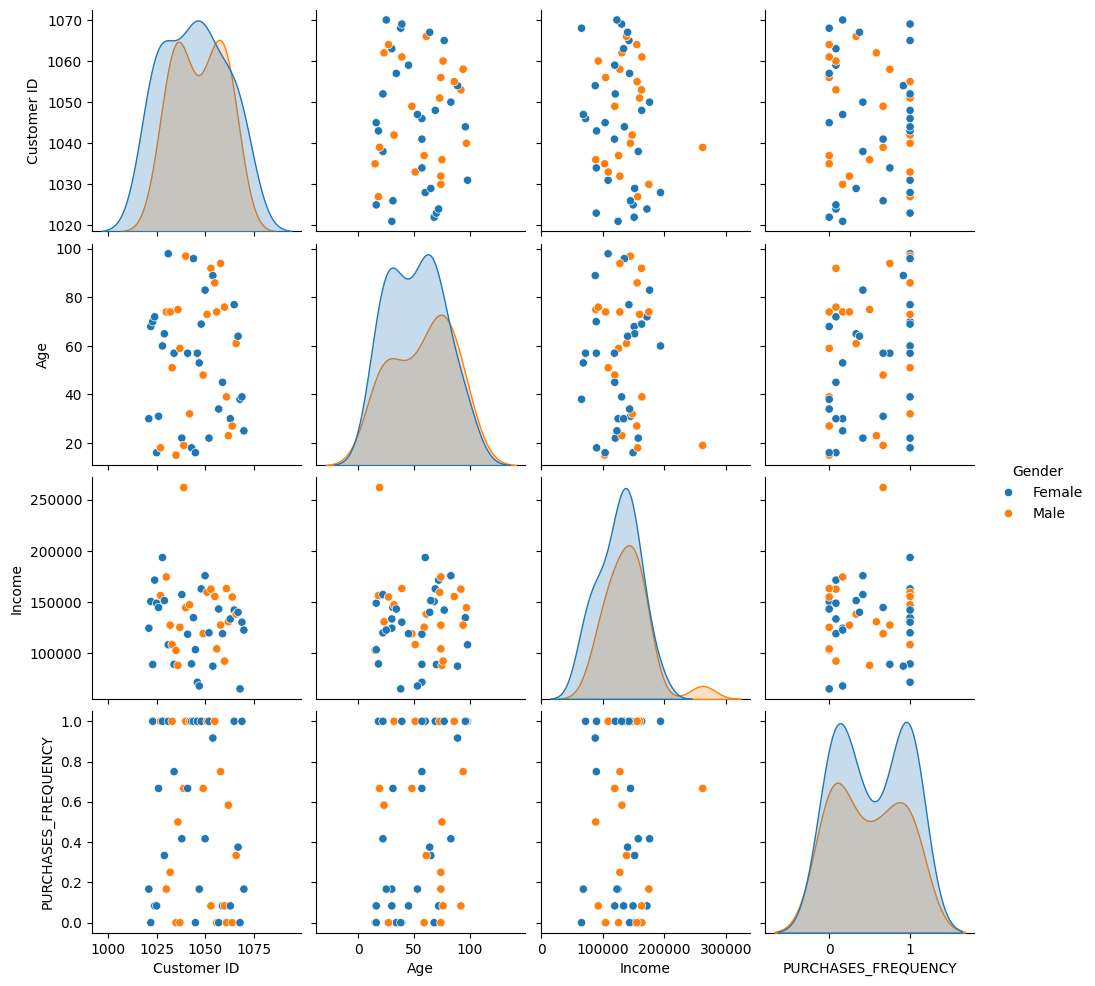

In [11]:
sns.pairplot(df, hue='Gender' )

In [12]:
for i in columns:
  print('\t',i);
  print(df.groupby(['Gender', 'Education'])[i].mean());

	 Age
Gender  Education
Female  PG           51.900000
        School       50.555556
        UG           52.700000
Male    PG           53.125000
        School       47.857143
        UG           74.500000
Name: Age, dtype: float64
	 Income
Gender  Education
Female  PG           111240.100000
        School       124169.333333
        UG           143223.100000
Male    PG           129962.125000
        School       152834.857143
        UG           139768.500000
Name: Income, dtype: float64
	 PURCHASES_FREQUENCY
Gender  Education
Female  PG           0.462500
        School       0.703704
        UG           0.441667
Male    PG           0.468750
        School       0.619048
        UG           0.333333
Name: PURCHASES_FREQUENCY, dtype: float64


In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df=df.drop('Review', axis=1)
df=df.drop('Education', axis=1)
df=df.drop('Customer ID', axis=1)
df.corr()

,Age,Gender,Income,PURCHASES_FREQUENCY
Age,1.000000,0.111099,-0.033992,0.230855
Gender,0.111099,1.000000,0.198927,-0.060600
Income,-0.033992,0.198927,1.000000,0.021252
PURCHASES_FREQUENCY,0.230855,-0.060600,0.021252,1.000000


<Axes: >

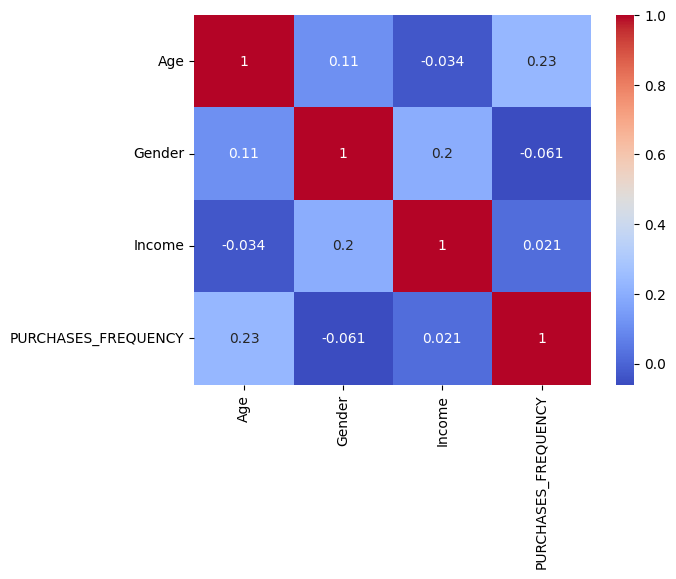

In [14]:
sns.heatmap(df.corr(), annot= True, cmap= 'coolwarm')

CLUSTERING- UNIVARIATE, BIVARIATE AND MULTIVARIATE

In [15]:
clustering1= KMeans(n_clusters=3)

In [16]:
clustering1.fit(df[['Income']])

KMeans(n_clusters=3)

In [17]:
clustering1.labels_

array([0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0], dtype=int32)

In [18]:
df['Income cluster']= clustering1.labels_
df.head()

,Age,Gender,Income,PURCHASES_FREQUENCY,Income cluster
0,30,0,124670,0.166667,0
1,68,0,150773,0.000000,2
2,70,0,89210,1.000000,0
3,72,0,171565,0.083333,2
4,16,0,149031,0.083333,2


In [19]:
df['Income cluster'].value_counts()

,count
Income cluster,
2,26
0,23
1,1


In [20]:
clustering1.inertia_

14257317741.063547

ELBOW METHOD- FOR SELECTING RIGHT NUMBER OF CLUSTERS

In [21]:
inertia_scores=[]
for i in range (1, 11):
  kmeans= KMeans(n_clusters=i)
  kmeans.fit(df[['Income']])
  inertia_scores.append(kmeans.inertia_)

In [22]:
inertia_scores

[61252875490.72,
 25647346832.719997,
 14586966517.599998,
 12351685889.928205,
 4201406601.1321425,
 2734146990.1840653,
 1878210638.1797981,
 999357825.6797979,
 829138368.8865079,
 423606036.98769855]

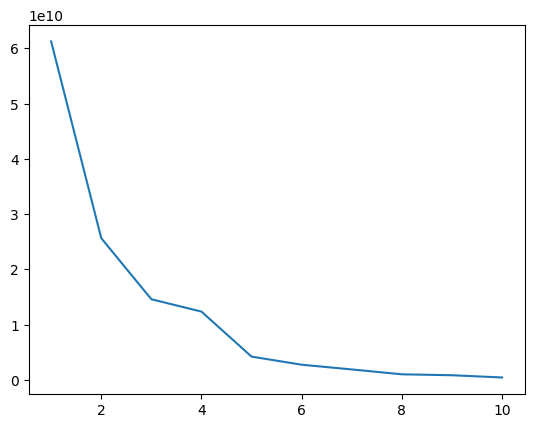

In [23]:
plt.plot(range(1, 11), inertia_scores)

In [24]:
df.columns

Index(['Age', 'Gender', 'Income', 'PURCHASES_FREQUENCY', 'Income cluster'], dtype='object')

In [25]:
columns= ['Age', 'Income', 'PURCHASES_FREQUENCY', 'Income cluster']
for i in columns:
  print('\t', i)
  print(df.groupby('Income cluster')[i].mean())

	 Age
Income cluster
0    53.956522
1    19.000000
2    55.692308
Name: Age, dtype: float64
	 Income
Income cluster
0    103330.347826
1    261952.000000
2    152759.923077
Name: Income, dtype: float64
	 PURCHASES_FREQUENCY
Income cluster
0    0.485507
1    0.666667
2    0.524038
Name: PURCHASES_FREQUENCY, dtype: float64
	 Income cluster
Income cluster
0    0.0
1    1.0
2    2.0
Name: Income cluster, dtype: float64


BIVARIATE

In [26]:
clustering2= KMeans()
clustering2.fit(df[['Income', 'PURCHASES_FREQUENCY']])
clustering2.labels_

df['Income and Purchase_Frequency cluster']= clustering2.labels_

df.head()

,Age,Gender,Income,PURCHASES_FREQUENCY,Income cluster,Income and Purchase_Frequency cluster
0,30,0,124670,0.166667,0,5
1,68,0,150773,0.000000,2,1
2,70,0,89210,1.000000,0,7
3,72,0,171565,0.083333,2,4
4,16,0,149031,0.083333,2,1


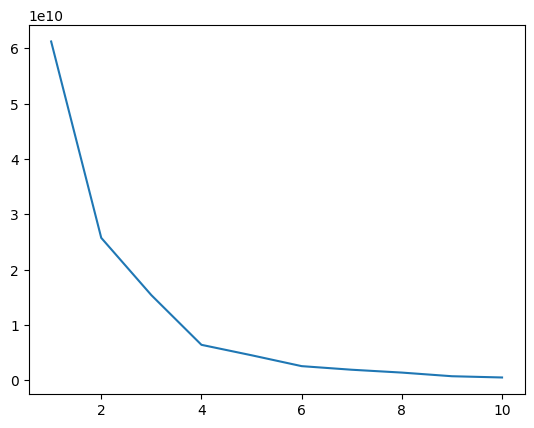

In [27]:
inertia_scores2=[]
for i in range (1, 11):
  kmeans2= KMeans(n_clusters=i)
  kmeans2.fit(df[['Income']])
  inertia_scores2.append(kmeans2.inertia_)
#To determine appropriate no of clusters
plt.plot(range(1, 11), inertia_scores2)

In [28]:
columns= ['Age', 'Income', 'PURCHASES_FREQUENCY', 'Income cluster', 'Income and Purchase_Frequency cluster']
for i in columns:
  print('\t', i)
  print(df.groupby('Income and Purchase_Frequency cluster')[i].mean())

	 Age
Income and Purchase_Frequency cluster
0    49.333333
1    51.400000
2    74.500000
3    19.000000
4    69.857143
5    49.384615
6    35.000000
7    64.166667
Name: Age, dtype: float64
	 Income
Income and Purchase_Frequency cluster
0     68531.333333
1    149129.866667
2    108578.000000
3    261952.000000
4    172116.142857
5    125831.615385
6    103690.333333
7     89493.833333
Name: Income, dtype: float64
	 PURCHASES_FREQUENCY
Income and Purchase_Frequency cluster
0    0.388889
1    0.547222
2    1.000000
3    0.666667
4    0.392857
5    0.493590
6    0.000000
7    0.708333
Name: PURCHASES_FREQUENCY, dtype: float64
	 Income cluster
Income and Purchase_Frequency cluster
0    0.000000
1    2.000000
2    0.000000
3    1.000000
4    2.000000
5    0.615385
6    0.000000
7    0.000000
Name: Income cluster, dtype: float64
	 Income and Purchase_Frequency cluster
Income and Purchase_Frequency cluster
0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
7    7.0
Name: Income a

In [29]:
centers= pd.DataFrame(clustering2.cluster_centers_)
centers.columns= ['x', 'y']
centers

,x,y
0,68531.333333,0.388889
1,149129.866667,0.547222
2,108578.000000,1.000000
3,261952.000000,0.666667
4,172116.142857,0.392857
5,125831.615385,0.493590
6,103690.333333,0.000000
7,89493.833333,0.708333


<Axes: xlabel='Income', ylabel='PURCHASES_FREQUENCY'>

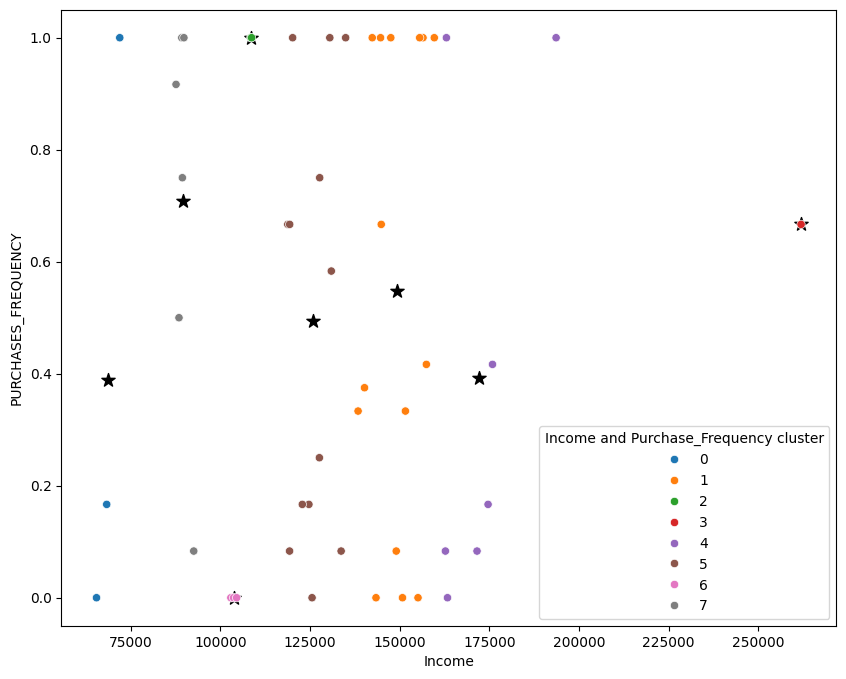

In [30]:
plt.figure(figsize= (10, 8))
plt.scatter(x=centers['x'] ,y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df, x='Income', y="PURCHASES_FREQUENCY", hue='Income and Purchase_Frequency cluster', palette= 'tab10')

In [31]:
pd.crosstab(df['Income and Purchase_Frequency cluster'], df['Gender'], normalize= 'index')

Gender,0,1
Income and Purchase_Frequency cluster,,
0,1.000000,0.000000
1,0.533333,0.466667
2,0.500000,0.500000
3,0.000000,1.000000
4,0.571429,0.428571
5,0.615385,0.384615
6,0.333333,0.666667
7,0.666667,0.333333


In [32]:
columns=['Income', 'PURCHASES_FREQUENCY', 'Age' ]
for i in columns:
  print(df.groupby('Income and Purchase_Frequency cluster')[i].mean())

Income and Purchase_Frequency cluster
0     68531.333333
1    149129.866667
2    108578.000000
3    261952.000000
4    172116.142857
5    125831.615385
6    103690.333333
7     89493.833333
Name: Income, dtype: float64
Income and Purchase_Frequency cluster
0    0.388889
1    0.547222
2    1.000000
3    0.666667
4    0.392857
5    0.493590
6    0.000000
7    0.708333
Name: PURCHASES_FREQUENCY, dtype: float64
Income and Purchase_Frequency cluster
0    49.333333
1    51.400000
2    74.500000
3    19.000000
4    69.857143
5    49.384615
6    35.000000
7    64.166667
Name: Age, dtype: float64


MULTIVARIATE CLUSTERING

In [33]:
from sklearn.preprocessing import StandardScaler
df.head()
scale =StandardScaler()

In [34]:
dff= pd.get_dummies(df, drop_first=True)
dff.head()

,Age,Gender,Income,PURCHASES_FREQUENCY,Income cluster,Income and Purchase_Frequency cluster
0,30,0,124670,0.166667,0,5
1,68,0,150773,0.000000,2,1
2,70,0,89210,1.000000,0,7
3,72,0,171565,0.083333,2,4
4,16,0,149031,0.083333,2,1


In [35]:
dff.columns

Index(['Age', 'Gender', 'Income', 'PURCHASES_FREQUENCY', 'Income cluster',
       'Income and Purchase_Frequency cluster'],
      dtype='object')

In [36]:
dff=dff[['Age', 'Income', 'PURCHASES_FREQUENCY', 'Income cluster',
       'Income and Purchase_Frequency cluster', 'Gender']]
dff.head()

,Age,Income,PURCHASES_FREQUENCY,Income cluster,Income and Purchase_Frequency cluster,Gender
0,30,124670,0.166667,0,5,0
1,68,150773,0.000000,2,1,0
2,70,89210,1.000000,0,7,0
3,72,171565,0.083333,2,4,0
4,16,149031,0.083333,2,1,0


In [37]:
dff= pd.DataFrame(scale.fit_transform(dff))

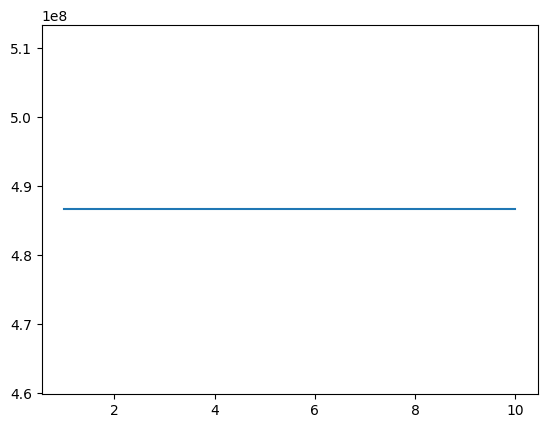

In [38]:
inertia_scores3=[]
for i in range (1, 11):
  kmeans3= KMeans(n_clusters=i)
  kmeans3.fit(df[['Income']])
  inertia_scores3.append(kmeans2.inertia_)
#To determine appropriate no of clusters
plt.plot(range(1, 11), inertia_scores3)

In [39]:
df.to_csv('Kluster.csv')